In [2]:
import real_robot.envs
import gym

image_obs_mode = "front"
camera_name = f"{image_obs_mode}_camera"
env = gym.make("GraspAnything-v0", image_obs_mode=image_obs_mode)
obs = env.reset()
env.agent.control_mode, env.agent.motion_mode

ROBOT_IP: 192.168.1.229, VERSION: v1.12.10, PROTOCOL: V1, DETAIL: 7,7,XS1304,AC1302,v1.12.10, TYPE1300: [1, 1]
change prot_flag to 3
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[SDK][ERROR][2023-09-04 13:34:43][base.py:348] - - API -> motion_enable -> code=3
[set_state], xArm is ready to move


realsense.py - (realsense.py:32) - INFO - 2023-09-04 13:34 - Found Intel RealSense D435 (S/N: 146322072630 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:36) - INFO - 2023-09-04 13:34 - Found 1 devices


[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


RSDevice - (realsense.py:126) - INFO - 2023-09-04 13:34 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:75) - INFO - 2023-09-04 13:34 - Setting Depth "option.exposure" to 1500
RSDevice - (realsense.py:138) - INFO - 2023-09-04 13:34 - Started device <RSDevice: Intel RealSense D435 (S/N: 146322072630)> with 2 streams
RSDevice - (realsense.py:140) - INFO - 2023-09-04 13:34 - <pyrealsense2.[video_]stream_profile: Depth(0) 848x480 @ 30fps Z16>
RSDevice - (realsense.py:140) - INFO - 2023-09-04 13:34 - <pyrealsense2.[video_]stream_profile: Color(0) 848x480 @ 30fps RGB8>


FEngine (64 bits) created at 0x56330be4bcd0 (threading is enabled)
FEngine resolved backend: OpenGL
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************


/usr/local/lib/python3.10/dist-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


('pd_ee_pose_quat', 'cartesian_online')

In [3]:
from collections import defaultdict

save_dict_array = []

while True:
    obs = env.get_obs()
    camera_params = obs["camera_param"][camera_name]
    rgb_frame = obs["image"][camera_name]["rgb"]
    depth_frame = obs["image"][camera_name]["depth"][..., 0]

    save_dict = {}
    save_dict.update(camera_params)
    save_dict["rgb"] = rgb_frame
    save_dict["depth"] = depth_frame
    save_dict_array.append(save_dict)

    # Visualization
    obs_dict = defaultdict(list)

    obs_dict["camera_names"].append(camera_name)
    obs_dict["color_images"].append(rgb_frame)
    obs_dict["depth_images"].append(depth_frame)

    env.visualizer.show_observation(**obs_dict)
    env.visualizer.render()


KeyboardInterrupt: 

In [6]:
import numpy as np
np.savez("/rl_benchmark/real_robot/notebooks/real_images/mug_hand_cam_video_20230902.npz", save_dict_array)

In [11]:
data = np.load("/rl_benchmark/real_robot/notebooks/real_images/mug_hand_cam_video_20230902.npz", allow_pickle=True)

In [17]:
d = data["arr_0"][1100]
d.keys()

dict_keys(['extrinsic_cv', 'cam2world_cv', 'intrinsic_cv', 'rgb', 'depth'])

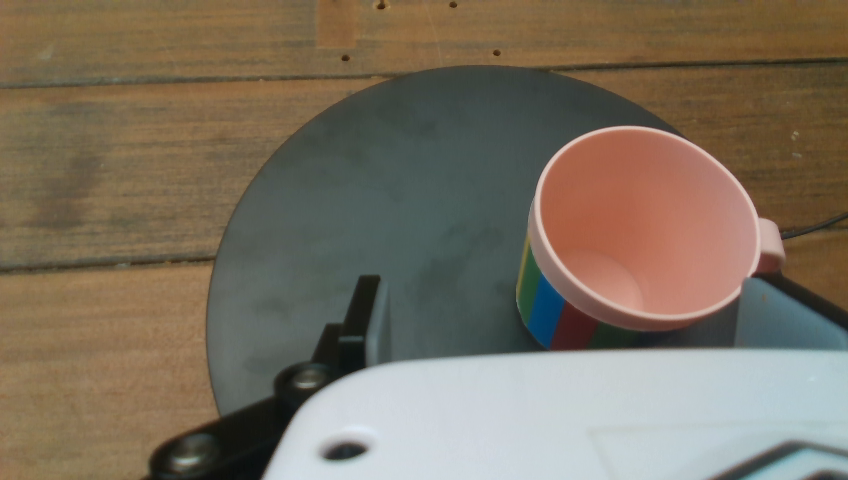

In [18]:
from PIL import Image
Image.fromarray(d["rgb"])

In [13]:
len(data["arr_0"])

1526

In [4]:
len(save_dict_array)

1526

In [5]:
import real_robot.envs
import gym

env = gym.make("PlaceCubeInBowlRealXArm-v8", control_mode="pd_ee_delta_pos",
               obs_mode="rgbd", robot_action_scale=100)
env._max_episode_steps = 400
obs = env.reset()

ROBOT_IP: 192.168.1.229, VERSION: v1.12.10, PROTOCOL: V1, DETAIL: 7,7,XS1304,AC1302,v1.12.10, TYPE1300: [1, 1]
change prot_flag to 3
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


RSDevice - (realsense.py:126) - INFO - 2023-08-01 13:13 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:75) - INFO - 2023-08-01 13:13 - Setting Depth "option.exposure" to 1500


RuntimeError: xioctl(VIDIOC_S_FMT) failed, errno=16 Last Error: Device or resource busy

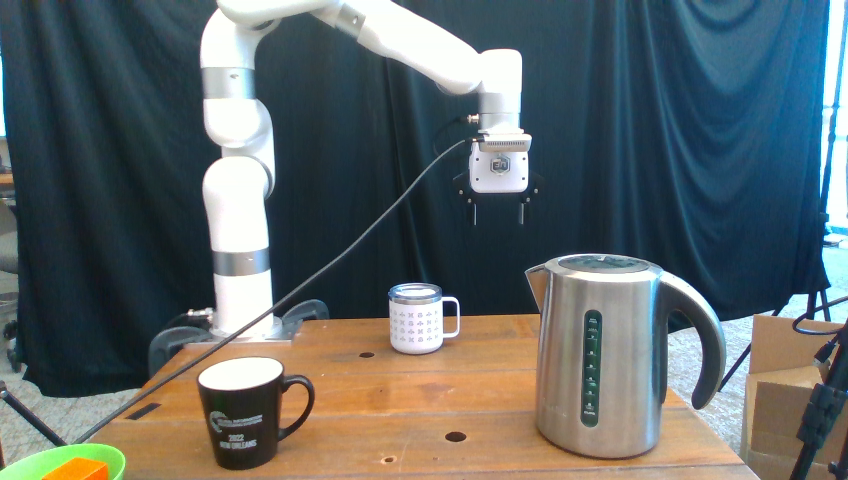

ControllerError, code: 1
ControllerError, code: 1
[SDK][ERROR][2023-08-01 13:13:44][base.py:161] - - [report-socket] socket read timeout
[SDK][ERROR][2023-08-01 13:13:44][base.py:161] - - [report-socket] socket read timeout
[SDK][ERROR][2023-08-01 13:15:07][base.py:1142] - - client timeout over 90s, disconnect
[SDK][ERROR][2023-08-01 13:15:10][base.py:1142] - - client timeout over 90s, disconnect


In [7]:
env.update_render()
env.take_picture()
obs = {
    "camera_param": env.get_camera_params(),
    "image": env.get_images(),
}

import numpy as np
np.savez("real_images/mug_obs_3.npz", obs)

from PIL import Image
Image.fromarray(obs["image"]["front_camera"]["rgb"])